In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from tensorflow.python import keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

/Users/jayantkumar/anaconda3/envs/opencv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jayantkumar/anaconda3/envs/opencv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jayantkumar/anaconda3/envs/opencv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jayantkumar/anaconda3

In [3]:
data_dir = '/Users/jayantkumar/Desktop/Traffic Sign Recognition' 

train_path = '/Users/jayantkumar/Desktop/Traffic Sign Recognition/Train'
test_path = '/Users/jayantkumar/Desktop/Traffic Sign Recognition/Test'
height = 30
width = 30
channels = 3

In [4]:
data = []
labels = []
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [5]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

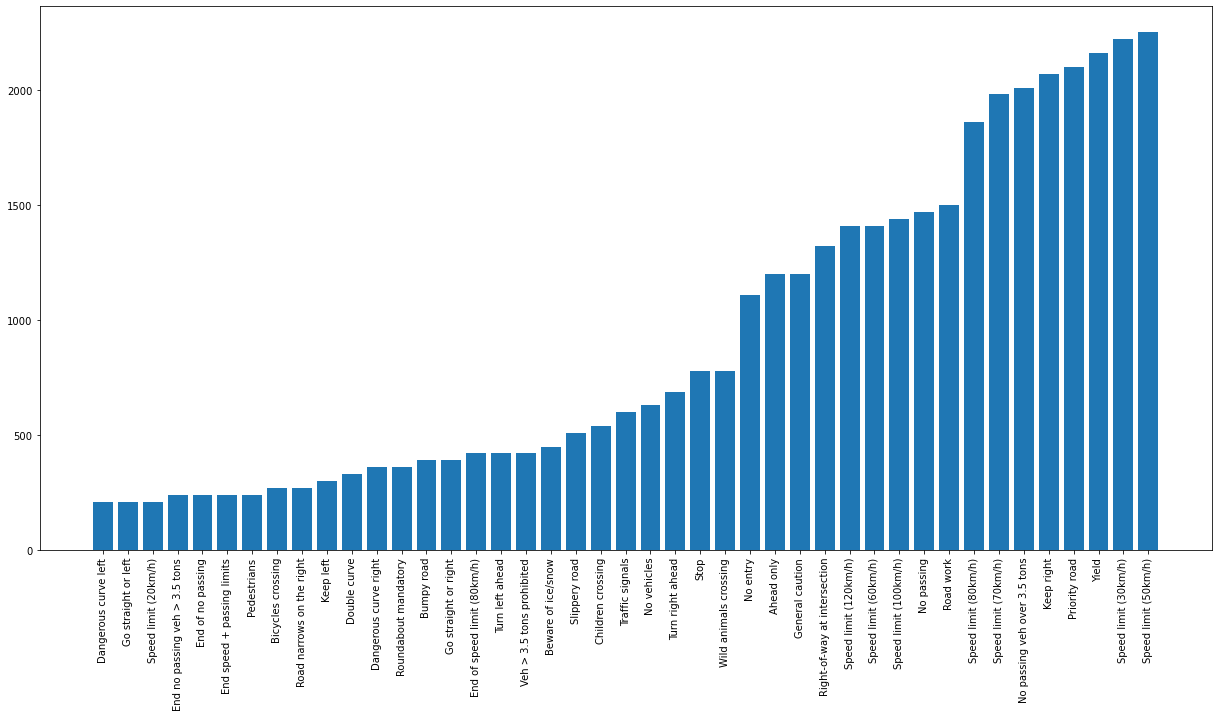

In [6]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [7]:
for i in range(NUM_CATEGORIES):
    path = os.path.join(train_path,str(i))
    images = os.listdir(path)
    
    for a in images:
       
            image = Image.open(path + '/' + a)
            image = image.resize((height,width))
            image = np.array(image)
            sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        
data = np.array(data)      
labels = np.array(labels)

In [8]:
print(data.shape,labels.shape)

X_train, X_test, Y_train, Y_test = train_test_split(data,labels,test_size=0.2,random_state=42, shuffle=True)

X_train = X_train/255 
X_test = X_test/255

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [9]:
Y_train=keras.utils.to_categorical(Y_train,NUM_CATEGORIES)
Y_test= keras.utils.to_categorical(Y_test,NUM_CATEGORIES)

print(Y_train.shape)
print(Y_test.shape)

(31367, 43)
(7842, 43)


In [10]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(height,width,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
__________

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
epochs = 11
MODEL = model.fit(X_train, Y_train, batch_size=32, epochs=epochs, validation_data=(X_test, Y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/11
31367/31367 [==============================] - 154s 5ms/step - loss: 1.0438 - acc: 0.7008 - val_loss: 0.0739 - val_acc: 0.9832
Epoch 2/11
31367/31367 [==============================] - 151s 5ms/step - loss: 0.1412 - acc: 0.9566 - val_loss: 0.0446 - val_acc: 0.9898
Epoch 3/11
31367/31367 [==============================] - 150s 5ms/step - loss: 0.0886 - acc: 0.9727 - val_loss: 0.0336 - val_acc: 0.9912
Epoch 4/11
31367/31367 [==============================] - 151s 5ms/step - loss: 0.0687 - acc: 0.9789 - val_loss: 0.0207 - val_acc: 0.9943
Epoch 5/11
31367/31367 [==============================] - 151s 5ms/step - loss: 0.0519 - acc: 0.9844 - val_loss: 0.0167 - val_acc: 0.9963
Epoch 6/11
31367/31367 [==============================] - 152s 5ms/step - loss: 0.0488 - acc: 0.9847 - val_loss: 0.0200 - val_acc: 0.9949
Epoch 7/11
31367/31367 [==============================] - 150s 5ms/step - loss: 0.0393 - acc: 0.9877 - val_loss: 0.0185 - v

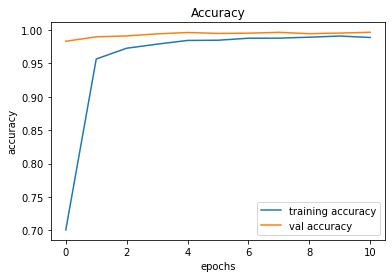

In [13]:
plt.figure(0)
plt.plot(MODEL.history['acc'], label='training accuracy')
plt.plot(MODEL.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

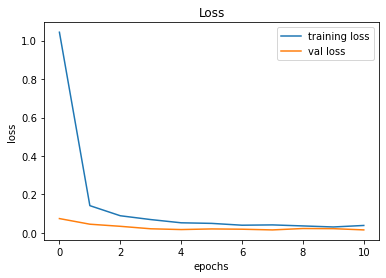

In [15]:
plt.plot(MODEL.history['loss'], label='training loss')
plt.plot(MODEL.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [21]:
cd /Users/jayantkumar/Desktop/Traffic Sign Recognition/

/Users/jayantkumar/Desktop/Traffic Sign Recognition


In [22]:
X_test, label = testing('Test.csv')

In [23]:
Y_pred = model.predict_classes(X_test)
Y_pred

array([16,  1, 38, ..., 32,  7, 10])

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.953840063341251


In [25]:
model.save("./training/TSR.h5")

In [29]:
import os
os.chdir(r'/Users/jayantkumar/Desktop/Traffic Sign Recognition')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [30]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Predicted traffic sign is:  Dangerous curve right


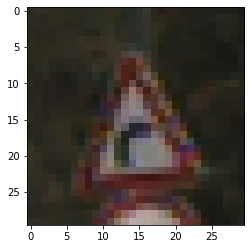

In [34]:
plot,prediction = test_on_img(r'/Users/jayantkumar/Desktop/Traffic Sign Recognition/Test/00017.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Pedestrians


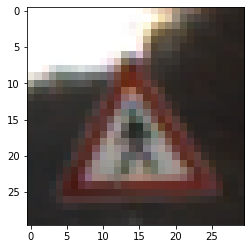

In [35]:
plot,prediction = test_on_img(r'/Users/jayantkumar/Desktop/Traffic Sign Recognition/Test/00018.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Keep right


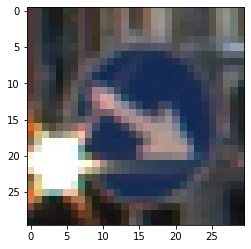

In [36]:
plot,prediction = test_on_img(r'/Users/jayantkumar/Desktop/Traffic Sign Recognition/Test/00019.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Speed limit (70km/h)


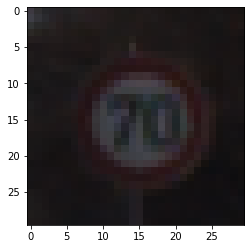

In [37]:
plot,prediction = test_on_img(r'/Users/jayantkumar/Desktop/Traffic Sign Recognition/Test/00020.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()